In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
file_path = "C:/Users/SAPTARSHI/Downloads/demographical_factors.xlsx"  
df = pd.read_excel(file_path)

In [4]:
# Rename columns for easier access
df.columns = [
    "Age_Group",
    "Gender",
    "Occupation",
    "Monthly_Income",
    "Education_Level",
    "Driving_Experience",
    "Red_Light_Violation"
]


In [5]:
# Check for missing values
df.dropna(inplace=True)

In [6]:
# Define independent variables (X) and target variable (y)
X = df.drop(columns=["Red_Light_Violation"])
y = df["Red_Light_Violation"]

In [7]:
# Standardize continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Get feature importance (coefficients)
feature_importance = np.abs(log_reg.coef_[0])

In [23]:
# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [24]:
# Print feature importance
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
              Feature  Importance
4     Education_Level    0.560098
0           Age_Group    0.348144
1              Gender    0.272940
3      Monthly_Income    0.246921
5  Driving_Experience    0.154531
2          Occupation    0.066075


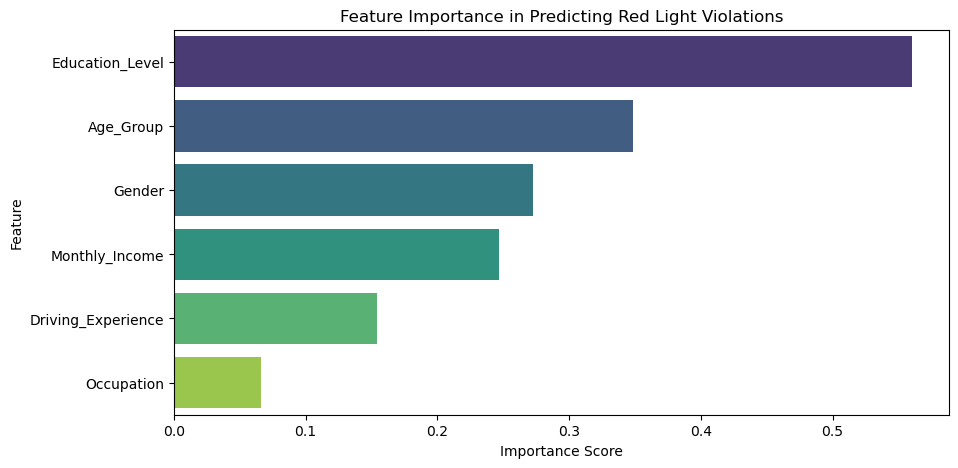

In [25]:
# Visualization of feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Red Light Violations")
plt.show()

In [14]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

In [15]:
# Create a DataFrame to display feature importance and odds ratios
importance_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients, "Odds_Ratio": odds_ratios})
importance_df = importance_df.sort_values(by="Odds_Ratio", ascending=False)

In [16]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df)

Feature Importance and Odds Ratios:
              Feature  Coefficient  Odds_Ratio
0           Age_Group     0.348144    1.416437
1              Gender     0.272940    1.313821
3      Monthly_Income     0.246921    1.280077
5  Driving_Experience     0.154531    1.167110
2          Occupation    -0.066075    0.936060
4     Education_Level    -0.560098    0.571153


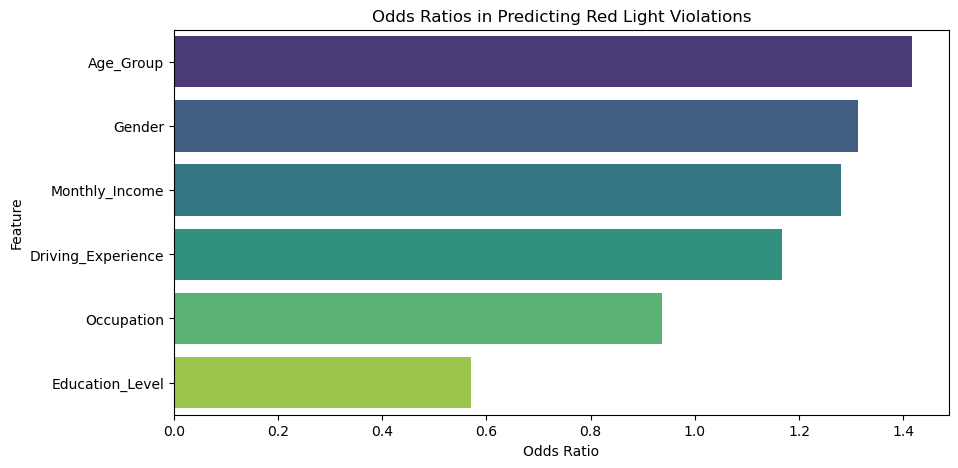

In [17]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Odds_Ratio"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations")
plt.show()